In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from scipy import stats
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from pandas import Series
import scipy.stats

In [66]:
df = pd.read_csv('*/EasternFiles.csv', header=0, index_col=0)

In [67]:
values = df.values
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

"""Perform train-test split with respect to time series structure."""
def timeseries_train_test_split(X, y, test_size):
    test_index = int(len(X) * (1 - test_size))
    X_train = X[:test_index]
    X_test = X[test_index:]
    y_train = y[:test_index]
    y_test = y[test_index:]
    return X_train, X_test, y_train, y_test


def root_mean_square_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())


def rsquared(y_true, y_pred):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_true, y_pred)
    return r_value**2

def plot_model_results(X, y, test_size=0.3, plot_intervals=False, plot_anomalies=False):

    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size)

    
    sc_X = StandardScaler()

    X_train = sc_X.fit_transform(X_train)

    X_test = sc_X.transform(X_test)

    #sc_y = StandardScaler()

    y_train = y_train.reshape((len(y_train), 1)) 

    y_train = sc_X.fit_transform(y_train)

    y_train = y_train.ravel()
    
    
    model = svr
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
   
    prediction = sc_X.inverse_transform(prediction) 
   
    
    error1= rsquared(prediction, y_test)
    print('Rsquared {0:.2f}%'.format(error1))
    
    error2= root_mean_square_error(prediction, y_test)
    print('Root mean error is {0:.2f}%'.format(error2))
    
    
    plt.figure(figsize=(15, 7))
    
    x = range(prediction.size)
    
    plt.plot(x, y_test, label='actual', color='green', linewidth=2.0)
    plt.plot(x, prediction, label='prediction', color='red',linewidth=2.0)
    
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(True)
    return model

In [68]:
# ensure all data is float
values = values.astype('float32')

# frame as supervised learning
#past,future
reframed = series_to_supervised(values, 7, 1)
reframed

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var8(t-7),var9(t-7),var1(t-6),...,var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
7,26.0,5.935697,290.250000,421.50,0.007875,86702.5,3.500000e-07,294.049988,286.174988,27.0,...,289.700012,40.0,3.027066,295.799988,418.75,0.009350,86800.0,9.990000e-08,299.825012,290.950012
8,27.0,6.368772,289.024994,317.75,0.008900,86737.5,2.100000e-06,291.625000,285.325012,26.0,...,290.950012,38.0,4.295419,294.399994,483.00,0.008650,87095.0,9.990000e-08,298.375000,289.774994
9,26.0,2.478533,294.600006,391.50,0.009500,86852.5,2.410000e-05,298.024994,289.274994,30.0,...,289.774994,44.0,4.089774,297.549988,483.50,0.009200,86847.5,9.990000e-08,300.075012,292.549988
10,30.0,2.316382,294.825012,320.75,0.011950,87210.0,9.990000e-08,297.149994,291.299988,19.0,...,292.549988,53.0,2.763716,298.350006,698.25,0.006000,86507.5,9.990000e-08,301.799988,295.299988
11,19.0,2.225000,297.399994,325.75,0.011250,86942.5,9.990000e-08,300.174988,293.399994,38.0,...,295.299988,39.0,2.277060,295.424988,310.75,0.010950,86510.0,8.910000e-05,298.325012,292.049988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,134.0,5.334440,291.899994,335.00,0.009975,87282.5,0.000000e+00,294.975006,288.500000,133.0,...,285.649994,130.0,1.054751,291.825012,373.00,0.005675,86790.0,0.000000e+00,295.850006,286.500000
3756,133.0,2.100595,294.125000,295.00,0.010025,86842.5,0.000000e+00,297.500000,290.350006,105.0,...,286.500000,136.0,1.113833,292.799988,332.50,0.007250,86817.5,0.000000e+00,295.975006,287.975006
3757,105.0,2.952647,293.299988,332.50,0.010600,86687.5,0.000000e+00,296.399994,290.174988,76.0,...,287.975006,141.0,3.471041,293.174988,397.50,0.008550,86837.5,0.000000e+00,296.725006,288.725006
3758,76.0,2.942151,292.924988,282.75,0.011375,86857.5,5.500000e-06,295.850006,289.250000,92.0,...,288.725006,82.0,2.035927,293.600006,312.25,0.009925,86697.5,0.000000e+00,296.725006,289.825012


In [69]:
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[46,47,48,49,50,51,52,53]], axis=1, inplace=True)
reframed.drop(reframed.columns[[64,65,66,67,68,69,70,71]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[127,128,129,130,131,132,133,134]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[190,191,192,193,194,195,196,197]], axis=1, inplace=True)
print(reframed.head())

    var1(t-7)  var2(t-7)   var3(t-7)  var4(t-7)  var5(t-7)  var6(t-7)  \
7        26.0   5.935697  290.250000     421.50   0.007875    86702.5   
8        27.0   6.368772  289.024994     317.75   0.008900    86737.5   
9        26.0   2.478533  294.600006     391.50   0.009500    86852.5   
10       30.0   2.316382  294.825012     320.75   0.011950    87210.0   
11       19.0   2.225000  297.399994     325.75   0.011250    86942.5   

       var7(t-7)   var8(t-7)   var9(t-7)  var1(t-6)  ...  var1(t-1)  \
7   3.500000e-07  294.049988  286.174988       27.0  ...       21.0   
8   2.100000e-06  291.625000  285.325012       26.0  ...       40.0   
9   2.410000e-05  298.024994  289.274994       30.0  ...       38.0   
10  9.990000e-08  297.149994  291.299988       19.0  ...       44.0   
11  9.990000e-08  300.174988  293.399994       38.0  ...       53.0   

    var2(t-1)   var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)     var7(t-1)  \
7    2.799330  293.450012     328.00   0.011175    86570.0

In [70]:
# extract out the features and labels into separate variables
y = reframed['var1(t)'].values
reframed = reframed.drop('var1(t)', axis=1)

In [71]:
X = reframed.values
feature_names = reframed.columns
print('dimension: ', X.shape)
reframed.head()

dimension:  (3753, 63)


,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var8(t-7),var9(t-7),var1(t-6),...,var9(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1)
7,26.0,5.935697,290.250000,421.50,0.007875,86702.5,3.500000e-07,294.049988,286.174988,27.0,...,291.700012,21.0,2.799330,293.450012,328.00,0.011175,86570.0,1.480000e-05,296.600006,289.700012
8,27.0,6.368772,289.024994,317.75,0.008900,86737.5,2.100000e-06,291.625000,285.325012,26.0,...,289.700012,40.0,3.027066,295.799988,418.75,0.009350,86800.0,9.990000e-08,299.825012,290.950012
9,26.0,2.478533,294.600006,391.50,0.009500,86852.5,2.410000e-05,298.024994,289.274994,30.0,...,290.950012,38.0,4.295419,294.399994,483.00,0.008650,87095.0,9.990000e-08,298.375000,289.774994
10,30.0,2.316382,294.825012,320.75,0.011950,87210.0,9.990000e-08,297.149994,291.299988,19.0,...,289.774994,44.0,4.089774,297.549988,483.50,0.009200,86847.5,9.990000e-08,300.075012,292.549988
11,19.0,2.225000,297.399994,325.75,0.011250,86942.5,9.990000e-08,300.174988,293.399994,38.0,...,292.549988,53.0,2.763716,298.350006,698.25,0.006000,86507.5,9.990000e-08,301.799988,295.299988


In [72]:
from sklearn.preprocessing import StandardScaler
svr= SVR(kernel='rbf', degree=1, gamma=0.004, C=2.62, verbose=True)#original

[LibSVM]Rsquared 0.48%
Root mean error is 28.19%


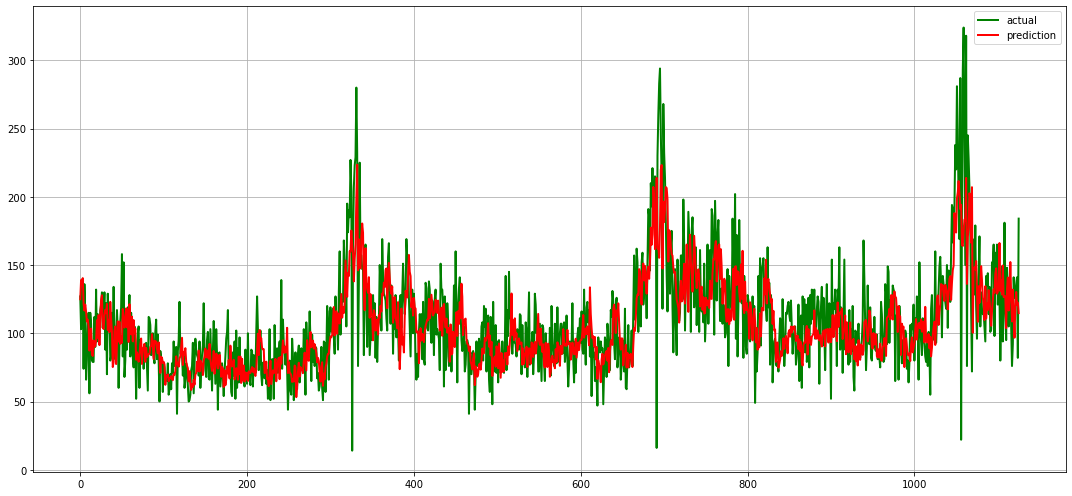

In [73]:
model = plot_model_results(X, y, plot_intervals=True)